In [1]:
#autoreload reloads modules automatically before entering the execution of code typed at the IPython prompt.
%load_ext autoreload
%autoreload 2

In [108]:
from simulations import queue_sim
from simulated_metrics import customers_dist, metrics, delay_dist
from analytical import stationary_distribution
from plot_metrics import plot_cdf, plot_pdf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## M/M/1: $\rho$ = 0.1, $\lambda$ = 1, $\mu$ = 10

In [272]:
sim = queue_sim(lamda = 1, mu = 10, runs = 100)

In [273]:
sim.data

,type,time,N,run,holding
0,a,0.000000,1,0,0.290858
1,s,0.290858,0,0,1.660834
2,a,1.951692,1,0,0.119788
3,s,2.071480,0,0,0.182145
4,a,2.253626,1,0,0.125085
...,...,...,...,...,...
99895,a,475.002378,1,99,0.091392
99896,s,475.093769,0,99,0.229524
99897,a,475.323294,1,99,0.080505
99898,s,475.403799,0,99,1.546220


,pdf,pdf_CI,cdf,cdf_CI
N,,,,
0,0.494178,"(0.46552573980787154, 0.5228312491354831)",0.494178,"(0.46552573980787154, 0.5228312491354831)"
1,0.246234,"(0.23690700190416, 0.25556133960220273)",0.740413,"(0.706491325620019, 0.7743340048296986)"
2,0.122331,"(0.11487941355526457, 0.12978257214565395)",0.862744,"(0.8335531146254871, 0.891934201525149)"
3,0.064958,"(0.056648464417364625, 0.07326696950466235)",0.927701,"(0.9048799185632439, 0.950522831509419)"
4,0.035221,"(0.02518710439212981, 0.04525579531883086)",0.962923,"(0.9498496486669966, 0.975996001116627)"
5,0.018341,"(0.012591791127502285, 0.02408968162357169)",0.981264,"(0.9728505907234003, 0.9896765318112976)"
6,0.010761,"(0.006170876127943412, 0.015351201863374932)",0.992025,"(0.9865063024811731, 0.9975428980448433)"
7,0.004392,"(0.0018071065865065041, 0.006977174967592842)",0.996417,"(0.9932671273228915, 0.999566354757224)"
8,0.003133,"(0.0008340129861117273, 0.005432842328701397)",0.998014,"(0.9960014962147138, 1.0000274763574073)"


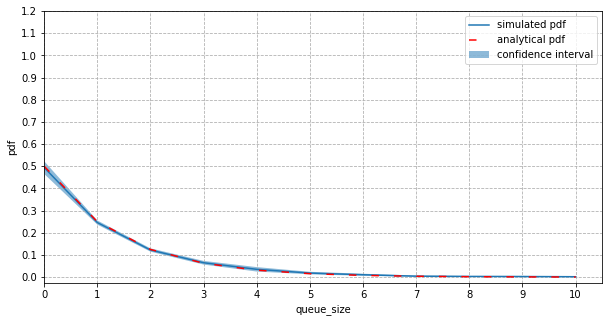

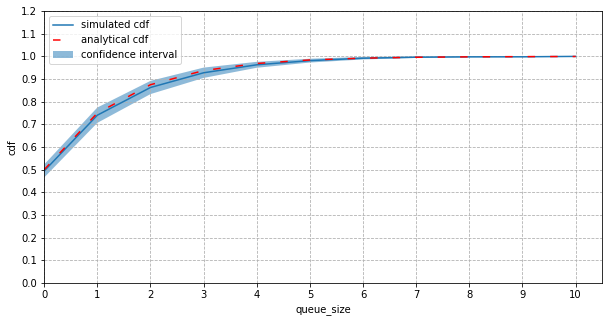

In [322]:
dist = customers_dist(sim)
display(dist)
plot_pdf(dist, sim.lamda, sim.mu)
plot_cdf(dist, sim.lamda, sim.mu)

In [275]:
metrics(sim)


Metrics
Delay             Simulated                                                0.111403
                  Confidence Interval      (0.110138208563792, 0.11266771399787961)
                  Analytical                                               0.111111
Wait              Simulated                                                0.011377
                  Confidence Interval  (0.010805344746341525, 0.011947757796461782)
                  Analytical                                               0.011111
Average Customers Simulated                                                0.111188
                  Confidence Interval    (0.10962788066168422, 0.11274765310077348)
                  Analytical                                               0.111111
Utilization       Simulated                                                 0.09981
                  Confidence Interval    (0.09860993629801475, 0.10101034502523827)
                  Analytical                                                    0.1

## M/M/1: $\rho$ = 0.2, $\lambda$ = 1, $\mu$ = 2

In [323]:
sim = queue_sim(lamda = 1, mu = 2)

In [324]:
metrics(sim)

Metrics
Delay             Simulated                                            0.957771
                  Confidence Interval  (0.8718390204633435, 1.0437028572904856)
                  Analytical                                                1.0
Wait              Simulated                                            0.464964
                  Confidence Interval  (0.3845957312611982, 0.5453317026740201)
                  Analytical                                                0.5
Average Customers Simulated                                            0.962767
                  Confidence Interval  (0.8547554890497407, 1.0707794978912912)
                  Analytical                                                1.0
Utilization       Simulated                                            0.492671
                  Confidence Interval   (0.474984649121159, 0.5103575246881421)
                  Analytical                                                0.5

,pdf,pdf_CI,cdf,cdf_CI
N,,,,
0,0.507329,"(0.4896424753118579, 0.525015350878841)",0.507329,"(0.4896424753118579, 0.525015350878841)"
1,0.251428,"(0.24348621575098342, 0.2593693580425756)",0.758757,"(0.7382959772069106, 0.7792174227773472)"
2,0.122407,"(0.1164384149989808, 0.12837545969288333)",0.881164,"(0.8608320979082391, 0.9014951767678829)"
3,0.060262,"(0.05409938269978818, 0.06642397822351198)",0.941425,"(0.9231620595596957, 0.9596885760397265)"
4,0.031915,"(0.025242036169069493, 0.03858884438750412)",0.973341,"(0.9584975867922843, 0.9881839293637114)"
5,0.013501,"(0.009047418327487181, 0.017954167043715722)",0.986842,"(0.9761150999051527, 0.9975680016220463)"
6,0.008385,"(0.0031304995008405298, 0.01363973877769746)",0.993765,"(0.9870034540738218, 1.0005257859016037)"
7,0.003509,"(0.00025146058105875125, 0.006766415079388341)",0.995492,"(0.9894669503424314, 1.0015170910007054)"
8,0.007569,"(0.006825527352227858, 0.008312480803867475)",0.991791,"(0.9832510220498227, 1.000331130807252)"


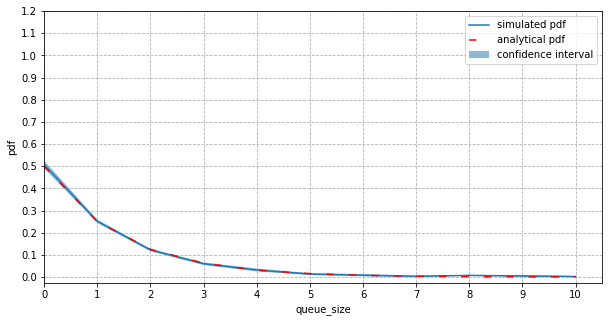

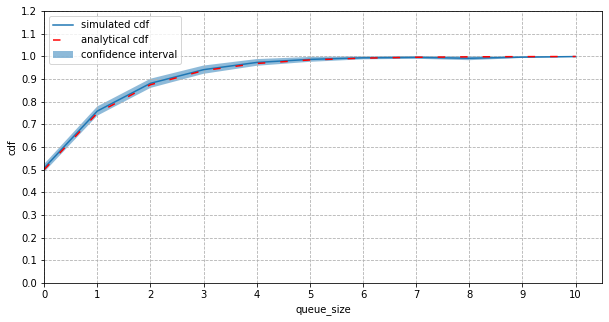

In [327]:
dist = customers_dist(sim)
display(dist)
plot_pdf(dist, sim.lamda, sim.mu)
plot_cdf(dist, sim.lamda, sim.mu)

In [326]:
customers_dist(sim)

,pdf,pdf_CI,cdf,cdf_CI
N,,,,
0,0.507329,"(0.4896424753118579, 0.525015350878841)",0.507329,"(0.4896424753118579, 0.525015350878841)"
1,0.251428,"(0.24348621575098342, 0.2593693580425756)",0.758757,"(0.7382959772069106, 0.7792174227773472)"
2,0.122407,"(0.1164384149989808, 0.12837545969288333)",0.881164,"(0.8608320979082391, 0.9014951767678829)"
3,0.060262,"(0.05409938269978818, 0.06642397822351198)",0.941425,"(0.9231620595596957, 0.9596885760397265)"
4,0.031915,"(0.025242036169069493, 0.03858884438750412)",0.973341,"(0.9584975867922843, 0.9881839293637114)"
5,0.013501,"(0.009047418327487181, 0.017954167043715722)",0.986842,"(0.9761150999051527, 0.9975680016220463)"
6,0.008385,"(0.0031304995008405298, 0.01363973877769746)",0.993765,"(0.9870034540738218, 1.0005257859016037)"
7,0.003509,"(0.00025146058105875125, 0.006766415079388341)",0.995492,"(0.9894669503424314, 1.0015170910007054)"
8,0.007569,"(0.006825527352227858, 0.008312480803867475)",0.991791,"(0.9832510220498227, 1.000331130807252)"


In [317]:
pi = stationary_distribution(sim.lamda, sim.mu).round(3)

pi[0:12]

array([0.5  , 0.25 , 0.125, 0.063, 0.031, 0.016, 0.008, 0.004, 0.002,
       0.001, 0.   , 0.   ])

## M/M/1: $\rho$ = 1.2, $\lambda$ = 12, $\mu$ = 10

In [328]:
sim = queue_sim(lamda = 12, mu = 10)

,pdf,pdf_CI,cdf,cdf_CI
N,,,,
0,0.007896,"(0.003907217857545381, 0.011884519146204692)",0.007896,"(0.003907217857545381, 0.011884519146204692)"
1,0.008674,"(0.005911310765252819, 0.011436674416483418)",0.015780,"(0.00969996494417083, 0.021860583540940462)"
2,0.006948,"(0.0034502546607100646, 0.010445033812153856)",0.022728,"(0.014172911192215183, 0.031282925765760035)"
3,0.009730,"(0.004826692011415159, 0.014633757505908273)",0.032458,"(0.020393379684631584, 0.04452290679066707)"
4,0.012915,"(0.007215409053343087, 0.018615511823214016)",0.045374,"(0.0292833597054195, 0.06146384764643627)"
...,...,...,...,...
133,0.005157,"(0.0002996965983522648, 0.01001377284518646)",0.911040,"(0.7568951992923094, 1.06518466162046)"
134,0.005405,"(-0.0029527567799376092, 0.013762903532681343)",0.916445,"(0.7706581028249909, 1.0622319048405222)"
135,0.011669,"(-0.006220751843580353, 0.02955921128647828)",0.928114,"(0.8002173141114691, 1.056011152996942)"


{'aa': 'aa', 'simulated_label': 'simulated pdf', 'analytical_label': 'analytical pdf', 'x_label': 'queue_size', 'y_label': 'pdf'}


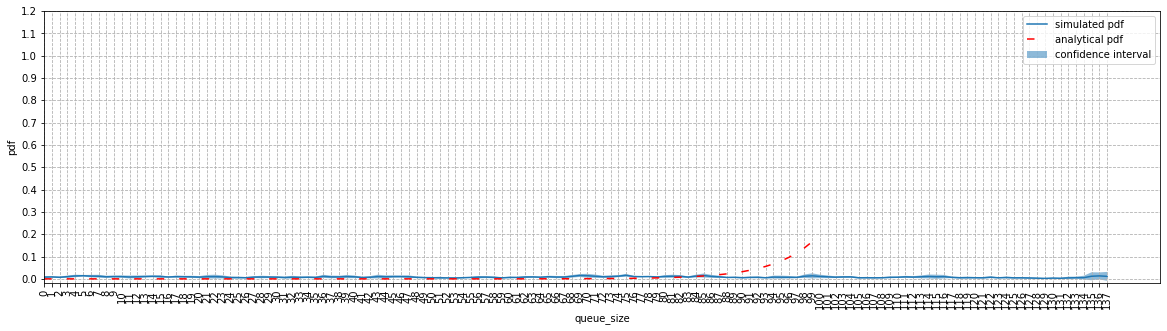

{'simulated_label': 'simulated cdf', 'analytical_label': 'analytical cdf', 'x_label': 'queue_size', 'y_label': 'cdf'}


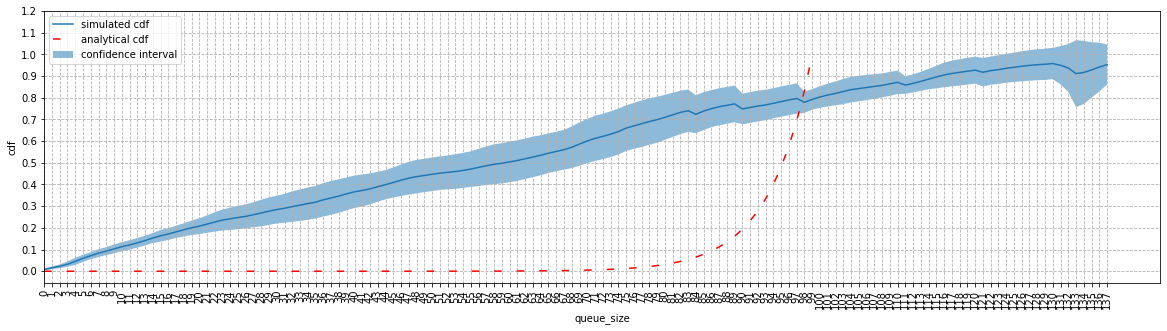

In [340]:
dist = customers_dist(sim)
display(dist)
plot_pdf(dist, sim.lamda, sim.mu, figsize=(20,5), xticks_dist = 5)
plot_cdf(dist, sim.lamda, sim.mu, figsize=(20,5))

In [ ]:
sim.data

,type,time,N,run,holding
0,a,0.000000,1,0,0.005614
1,a,0.005614,2,0,0.028164
2,s,0.033777,1,0,0.001634
3,a,0.035412,2,0,0.053870
4,s,0.089281,1,0,0.014857
...,...,...,...,...,...
9985,s,46.918307,63,9,0.027839
9986,s,46.946146,62,9,0.055169
9987,a,47.001315,63,9,0.044202
9988,s,47.045517,62,9,0.041047


In [ ]:
metrics(sim)

Metrics
Delay             Simulated                                           4.501929
                  Confidence Interval   (3.737957061276355, 5.265901917227033)
                  Analytical                                               inf
Wait              Simulated                                           4.401593
                  Confidence Interval    (3.63950288859379, 5.163683684626858)
                  Analytical                                               inf
Average Customers Simulated                                          54.366452
                  Confidence Interval   (44.49390180159235, 64.23900315397819)
                  Analytical                                               inf
Utilization       Simulated                                           0.991044
                  Confidence Interval  (0.987492038142582, 0.9945968906151819)
                  Analytical                                               1.2

In [ ]:
customers_dist(sim)

,pdf,pdf_CI,cdf,cdf_CI
N,,,,
0,0.008956,"(0.005403109384818154, 0.01250796185741793)",0.008956,"(0.005403109384818154, 0.01250796185741793)"
1,0.010498,"(0.006073566451308728, 0.014923304592314793)",0.019454,"(0.012604329381726731, 0.026303612904132877)"
2,0.009244,"(0.004365919604178235, 0.01412150180878733)",0.028698,"(0.018338003670581852, 0.03905736002824331)"
3,0.012268,"(0.004135301137945666, 0.020401622192569892)",0.040966,"(0.022814112779782108, 0.059118174249558605)"
4,0.013010,"(0.006176409799391013, 0.019843377428735154)",0.053976,"(0.030253471597835306, 0.07769860265963158)"
...,...,...,...,...
144,0.010147,"(0.008629811401188486, 0.011664107907101318)",0.963226,"(0.9569512057467858, 0.9695013996257743)"
145,0.013828,"(0.008613345876354657, 0.0190419611823428)",0.977054,"(0.9655645516231406, 0.9885433608081171)"
146,0.007630,"(-0.001075573737673397, 0.016335566206238473)",0.984684,"(0.9644889778854673, 1.0048789270143554)"


In [ ]:
pi = stationary_distribution(sim.lamda, sim.mu, capacity = 145).round(3)

pi

array([[0.   , 0.   , 0.   , ..., 0.116, 0.139, 0.167],
       [0.   , 0.   , 0.   , ..., 0.116, 0.139, 0.167],
       [0.   , 0.   , 0.   , ..., 0.116, 0.139, 0.167],
       ...,
       [0.   , 0.   , 0.   , ..., 0.116, 0.139, 0.167],
       [0.   , 0.   , 0.   , ..., 0.116, 0.139, 0.167],
       [0.   , 0.   , 0.   , ..., 0.116, 0.139, 0.167]])

Os resultados não batem porque essa fila não entra em estado estacionário. Se aumentarmos a iterações máximas de eventos e tempo de simulação, iremos obter tamanhos máximos de fila cada vez maiores

## M/M/1: $\rho$ = 2, $\lambda$ = 20, $\mu$ = 10

In [216]:
sim = queue_sim(lamda = 20, mu = 10, max_events = 1e100, max_time= 9999)

In [217]:
metrics(sim)

Metrics
Delay             Simulated                                         2503.479694
                  Confidence Interval   (2494.2651211580874, 2512.694267704122)
                  Analytical                                                inf
Wait              Simulated                                          2503.37959
                  Confidence Interval  (2494.1651190276466, 2512.5940617432766)
                  Analytical                                                inf
Average Customers Simulated                                        50085.355559
                  Confidence Interval    (49915.90557060024, 50254.80554712469)
                  Analytical                                                inf
Utilization       Simulated                                            0.999994
                  Confidence Interval  (0.9999886014767685, 0.9999989635440967)
                  Analytical                                                2.0

In [220]:
dist = customers_dist(sim)

dist[0: 367]

,pdf,pdf_CI,cdf,cdf_CI
N,,,,
0,0.000012,"(5.5576949784884e-06, 1.931226329133704e-05)",0.000012,"(5.5576949784884e-06, 1.931226329133704e-05)"
1,0.000015,"(6.537202546087851e-06, 2.32145227354102e-05)",0.000021,"(8.161890375140899e-06, 3.402481404126987e-05)"
2,0.000020,"(1.0130261306122192e-05, 2.9351003488617595e-05)",0.000041,"(2.1926746548926512e-05, 5.974122266222405e-05)"
3,0.000010,"(5.289519653228078e-06, 1.5302673173761546e-05)",0.000051,"(2.9078836206704034e-05, 7.318132583143615e-05)"
4,0.000009,"(4.615380910076539e-06, 1.2504126124321547e-05)",0.000060,"(3.659985276263463e-05, 8.277981630990364e-05)"
...,...,...,...,...
362,0.000012,"(2.8505991107230864e-06, 2.1141976157783694e-05)",0.003705,"(0.0035254539584477777, 0.003885323880349049)"
363,0.000006,"(2.942054708147158e-06, 9.183046014445609e-06)",0.003711,"(0.003531068737907849, 0.003891834201611571)"
364,0.000012,"(5.036586957818562e-06, 1.883655678380388e-05)",0.003723,"(0.00354458505525218, 0.0039021910280088636)"


In [222]:
pi = stationary_distribution(sim.lamda, sim.mu, capacity = 1000)

pi[0][0: 367].cumsum()

array([9.33263619e-302, 2.79979086e-301, 6.53284533e-301, 1.39989543e-300,
       2.89311722e-300, 5.87956080e-300, 1.18524480e-299, 2.37982223e-299,
       4.76897709e-299, 9.54728682e-299, 1.91039063e-298, 3.82171452e-298,
       7.64436230e-298, 1.52896579e-297, 3.05802490e-297, 6.11614312e-297,
       1.22323796e-296, 2.44648525e-296, 4.89297983e-296, 9.78596899e-296,
       1.95719473e-295, 3.91439039e-295, 7.82878172e-295, 1.56575644e-294,
       3.13151297e-294, 6.26302603e-294, 1.25260522e-293, 2.50521044e-293,
       5.01042089e-293, 1.00208418e-292, 2.00416836e-292, 4.00833672e-292,
       8.01667344e-292, 1.60333469e-291, 3.20666938e-291, 6.41333875e-291,
       1.28266775e-290, 2.56533550e-290, 5.13067100e-290, 1.02613420e-289,
       2.05226840e-289, 4.10453680e-289, 8.20907360e-289, 1.64181472e-288,
       3.28362944e-288, 6.56725888e-288, 1.31345178e-287, 2.62690355e-287,
       5.25380711e-287, 1.05076142e-286, 2.10152284e-286, 4.20304568e-286,
       8.40609137e-286, 1

In [204]:
c_d = customers_dist(sim)
c_d.to_clipboard()
print(c_d)


          pdf                                            pdf_CI       cdf  \
N                                                                           
0    0.002800    (-0.0003372500650326441, 0.005937702033783982)  0.002800   
1    0.003058      (0.001667567029361578, 0.004448736932727618)  0.003898   
2    0.003232       (0.001734155670028657, 0.00472940375086156)  0.007130   
3    0.003001     (0.0017412413369094744, 0.004260442457133078)  0.010131   
4    0.002781     (0.0013071687494805215, 0.004255628527604412)  0.012912   
..        ...                                               ...       ...   
361  0.001719  (-0.00029001963881137866, 0.0037277540177253167)  0.989004   
362  0.002010    (0.0013948959844039682, 0.0026248741655644833)  0.991014   
363  0.002030      (0.001776625220299969, 0.002283233370850629)  0.993044   
364  0.002620     (-0.002096676329960307, 0.007336123903531714)  0.995664   
365  0.001626    (-0.0009422874766778311, 0.004193312690053796)  0.997289   

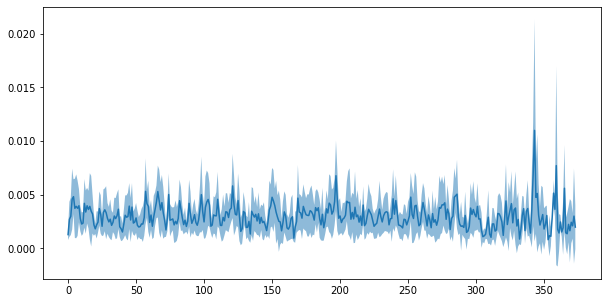

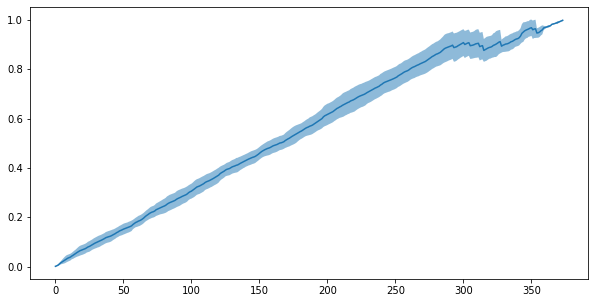

In [146]:
plot_pdf(c_d)
plot_cdf(c_d)
# sns.pointplot(x = c_d.index, y = 'pdf', data = c_d, color = 'blue')
# sns.pointplot(x = c_d.index, y = 'cdf', data = c_d, color = 'red')
# plt.show()

<AxesSubplot:xlabel='cut'>

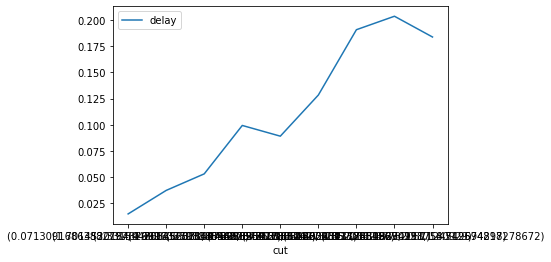

In [148]:
delays = delay_dist(sim)
delays[0].plot()